In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%pwd

'C:\\Users\\alejo\\UCEMA\\poo_teorica\\poo_ejercicios\\ejercicios_extra'

In [3]:
data_countries = pd.read_csv('../data_extra/countries.csv')
data_sample = pd.read_csv('../data_extra/sample_data.csv')

In [4]:
data_countries.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [5]:
data_sample.head()

,column_a,column_b,column_c
0,1,1,10
1,2,4,8
2,3,9,6
3,4,16,4
4,5,25,2


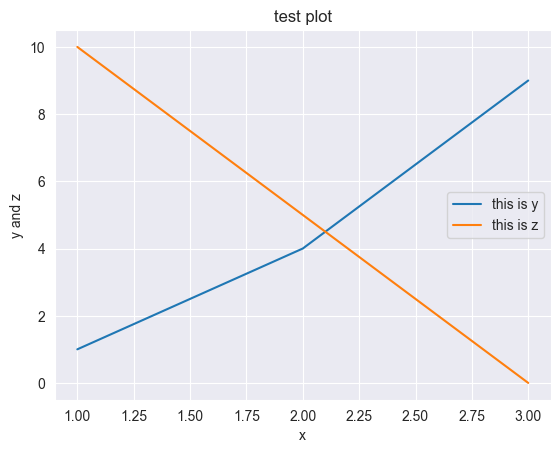

In [7]:
x= [1,2,3]
y= [1, 4, 9]
z = [10, 5, 0]
plt.plot(x,y)
plt.plot(x,z)
plt.title('test plot')
plt.xlabel('x')
plt.ylabel('y and z')
plt.legend(['this is y', 'this is z'])
plt.show()

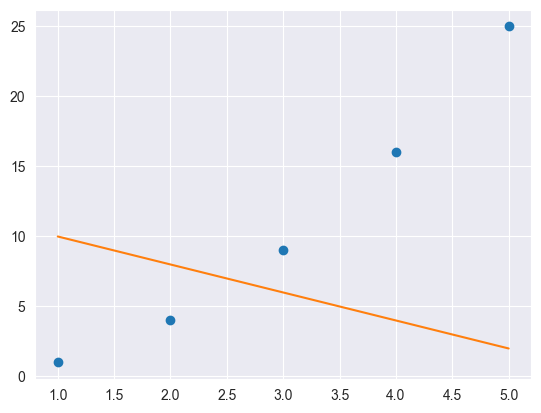

In [8]:
plt.plot(data_sample.column_a, data_sample.column_b, 'o')
plt.plot(data_sample.column_a, data_sample.column_c)
plt.show()

In [16]:
us = data_countries[data_countries.country == 'United States']
china = data_countries[data_countries.country == 'China']
us,china

(            country  year  population
 1608  United States  1952   157553000
 1609  United States  1957   171984000
 1610  United States  1962   186538000
 1611  United States  1967   198712000
 1612  United States  1972   209896000
 1613  United States  1977   220239000
 1614  United States  1982   232187835
 1615  United States  1987   242803533
 1616  United States  1992   256894189
 1617  United States  1997   272911760
 1618  United States  2002   287675526
 1619  United States  2007   301139947,
     country  year  population
 288   China  1952   556263527
 289   China  1957   637408000
 290   China  1962   665770000
 291   China  1967   754550000
 292   China  1972   862030000
 293   China  1977   943455000
 294   China  1982  1000281000
 295   China  1987  1084035000
 296   China  1992  1164970000
 297   China  1997  1230075000
 298   China  2002  1280400000
 299   China  2007  1318683096)

# DOS PLOTS


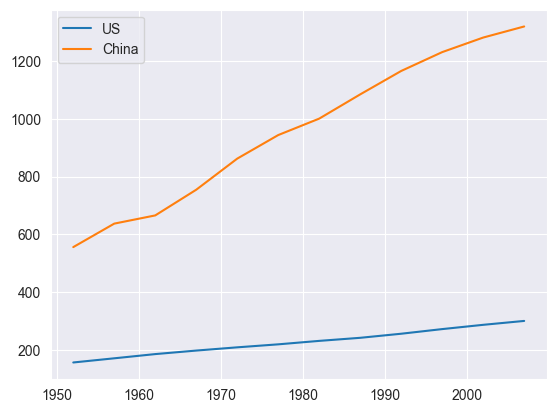

In [24]:
plt.plot(us.year, us.population/10**6)
plt.plot(china.year, china.population/10**6)
plt.legend(['US', 'China'])
plt.show()

# PLOTS CON CRECIMIENTO % DE POPULATION


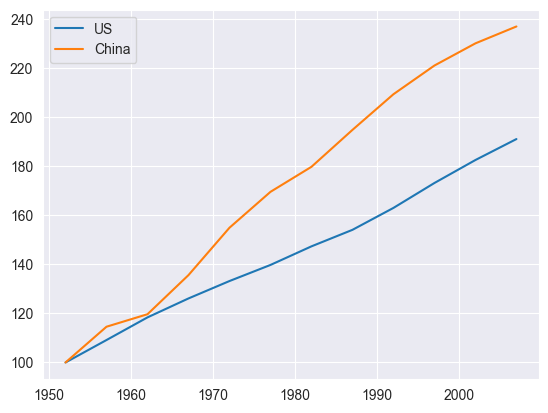

In [25]:
plt.plot(us.year, us.population/us.population.iloc[0] *100)
plt.plot(china.year, china.population/china.population.iloc[0] *100)
plt.legend(['US', 'China'])
plt.show()

# SUBPLOTS

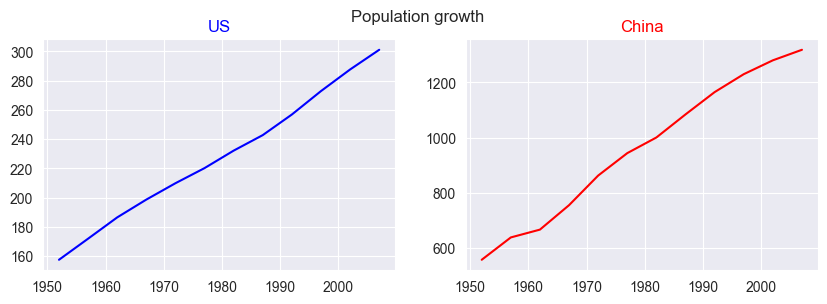

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10,3))
axs[0].plot( us.year, us.population/10**6, label='United states population growth',c='b')
axs[0].set_title('US', c='b')

axs[1].plot(china.year, china.population/10**6, label='China population growth', c='r')
axs[1].set_title('China', c='r')

plt.suptitle('Population growth')
plt.show()

# BARCHART

In [44]:
pop_mean_by_ctry = data_countries.groupby('country').max()['population']
greater = pop_mean_by_ctry[pop_mean_by_ctry > pop_mean_by_ctry.mean()]

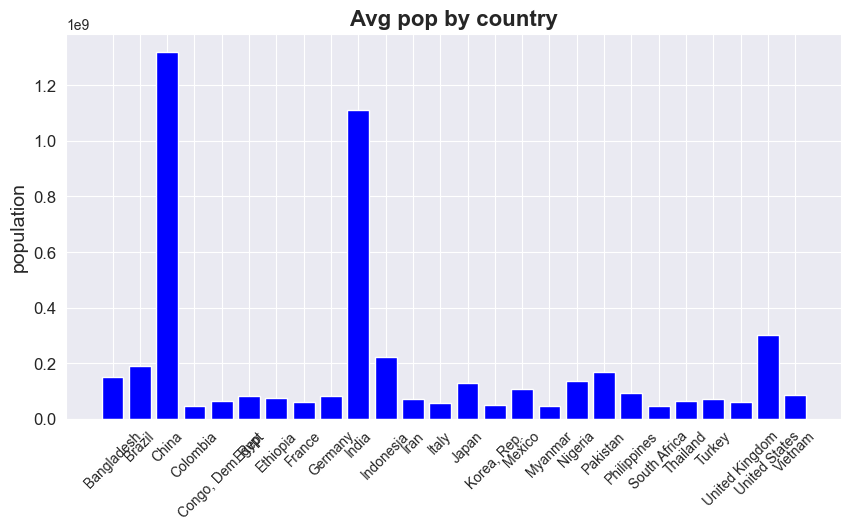

In [45]:
plt.figure(figsize=(10,5))
plt.bar(x=greater.index,height= greater, color='blue')
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.title("Avg pop by country",fontsize=16,fontweight='bold')
plt.ylabel("population", fontsize=14)
plt.show()

# PIE CHART


In [46]:
import seaborn as sns

In [50]:
penguins = sns.load_dataset('penguins')

In [51]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [52]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [56]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [67]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [70]:
count_by_species = penguins.groupby('species').count().island.to_frame('count')
count_by_species

,count
species,
Adelie,152
Chinstrap,68
Gentoo,124


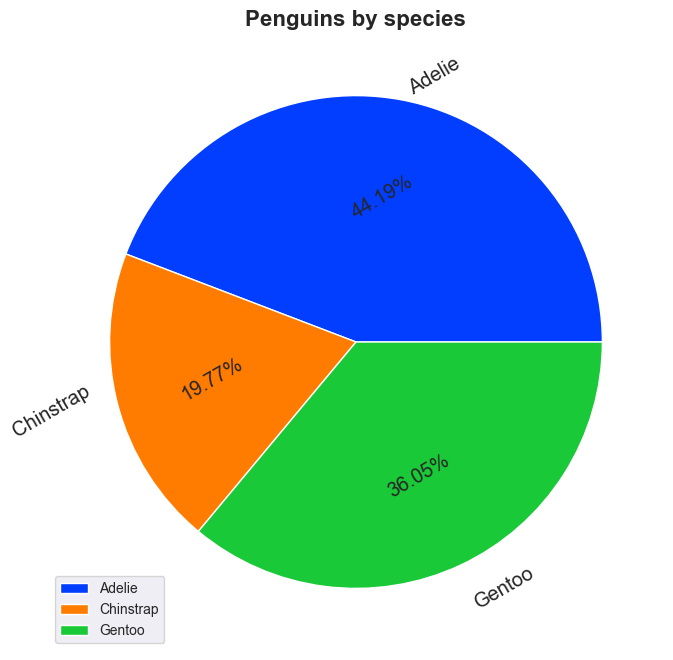

In [75]:
sns.set_palette('bright')
plt.figure(figsize=(10,8))
plt.pie(count_by_species['count'],
   labels=count_by_species.index,
    autopct='%.2f%%',
    textprops={"size": "x-large",
              "rotation": "30"})
plt.legend()
plt.title("Penguins by species", fontsize="16",fontweight="bold")
plt.show()

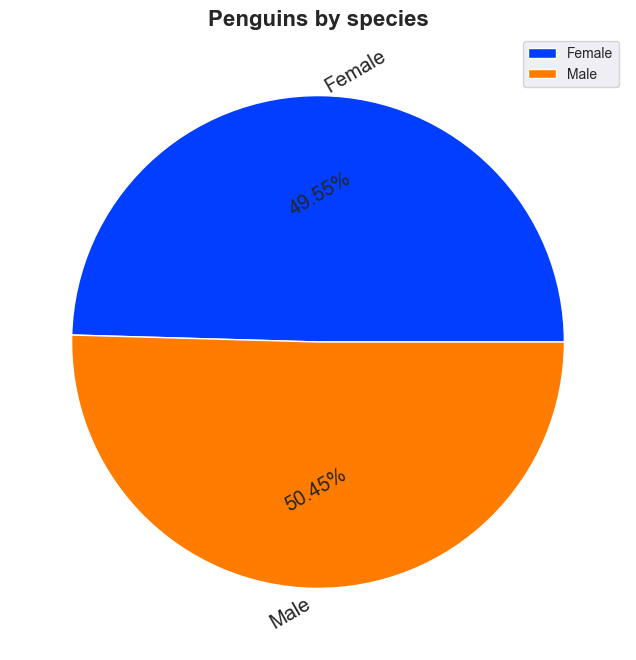

In [85]:
sns.set_palette('bright')
plt.figure(figsize=(10,8))
plt.pie(penguins.groupby('sex').count().island,
   labels=penguins.groupby('sex').count().index,
    autopct='%.2f%%',
    textprops={"size": "x-large",
              "rotation": "30"})
plt.legend()
plt.title("Penguins by species", fontsize="16",fontweight="bold")
plt.show()

In [91]:
penguins['tamaño'] = pd.qcut(penguins.body_mass_g, q=3, labels=['pequeño', 'mediano', 'grande'])
penguins['tamaño'].value_counts()

pequeño    117
grande     113
mediano    112
Name: tamaño, dtype: int64

In [103]:
count_by_species_tamano = penguins.groupby(['species', 'tamaño']).count().island.to_frame('count')
count_by_species_tamano

count
species   tamaño        
Adelie    pequeño     81
          mediano     63
          grande       7
Chinstrap pequeño     36
          mediano     31
          grande       1
Gentoo    pequeño      0
          mediano     18
          grande     105

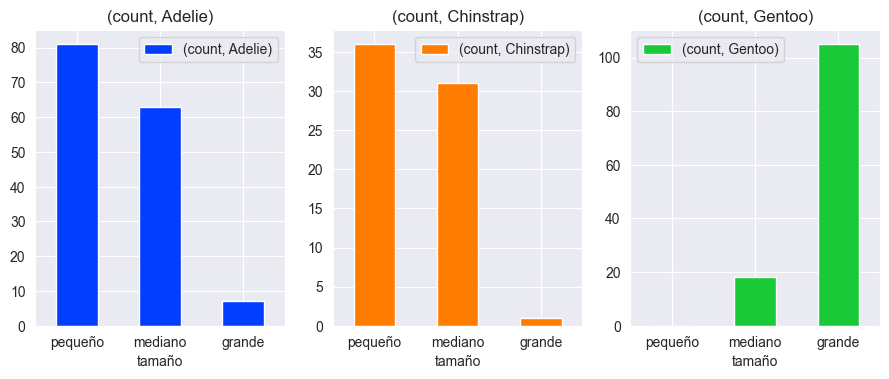

In [109]:
ax = count_by_species_tamano.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
plt.tight_layout()

In [107]:
count_by_species_tamano.unstack(level=0)

count                 
species Adelie Chinstrap Gentoo
tamaño                         
pequeño     81        36      0
mediano     63        31     18
grande       7         1    105

# LINE CHARTS

In [114]:
data_countries

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [115]:
data_countries.year.describe()

count    1704.00000
mean     1979.50000
std        17.26533
min      1952.00000
25%      1965.75000
50%      1979.50000
75%      1993.25000
max      2007.00000
Name: year, dtype: float64

In [118]:
us_mask = data_countries.country == 'United States'

In [127]:
data_countries.year.dtype

dtype('int64')

In [141]:
us_before_90s = data_countries[us_mask & (data_countries.year < 1985)]
us_after_90s = data_countries[us_mask & (data_countries.year > 1985)]


,country,year,population
1615,United States,1987,242803533
1616,United States,1992,256894189
1617,United States,1997,272911760
1618,United States,2002,287675526
1619,United States,2007,301139947


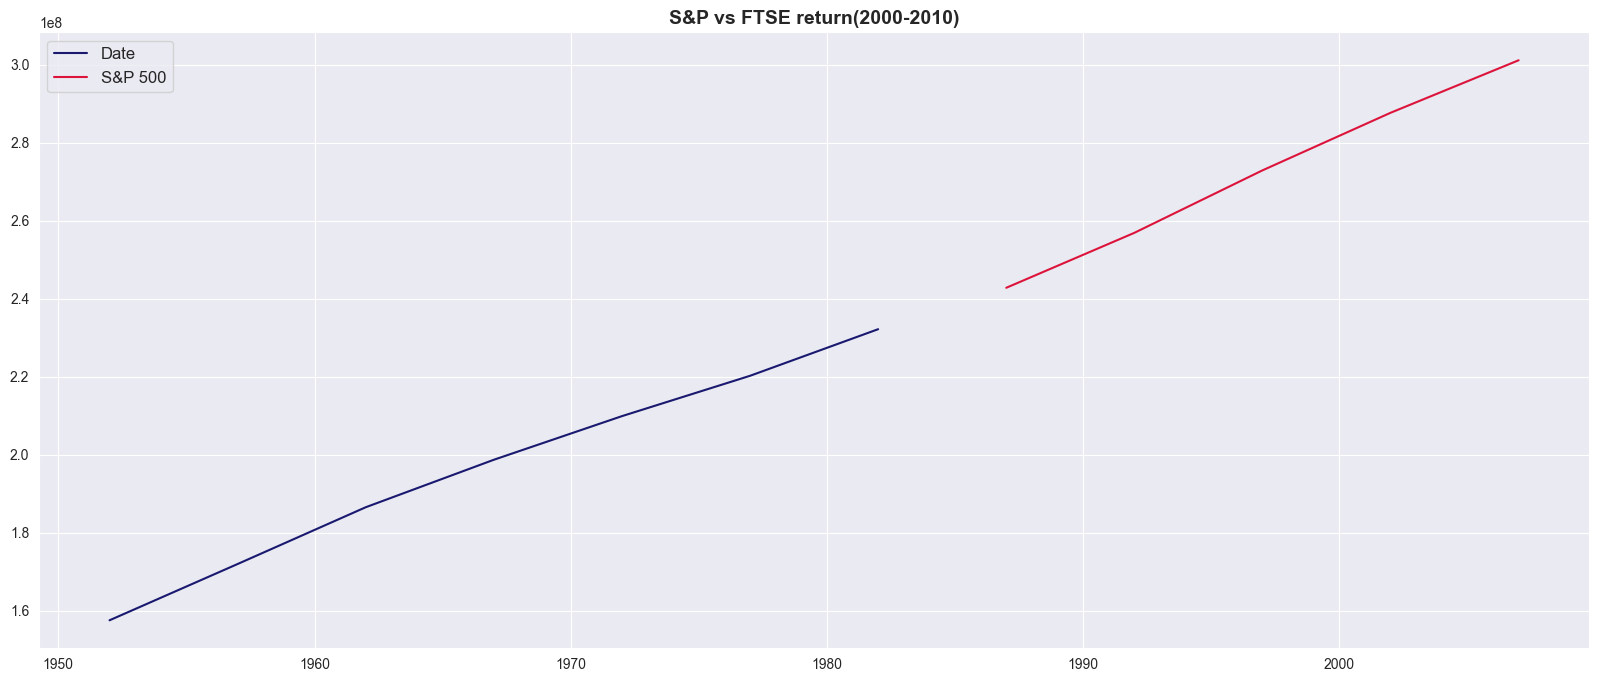

In [142]:
plt.figure(figsize=(20,8))
plt.plot(us_before_90s["year"],us_before_90s["population"],color="midnightblue")
plt.plot(us_after_90s["year"],us_after_90s["population"],color="crimson")
plt.title("S&P vs FTSE return(2000-2010)",fontsize=14,weight="bold")
plt.legend(labels=["Date","S&P 500","FTSE 100"], loc="upper left",fontsize="large")
plt.show()

In [146]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


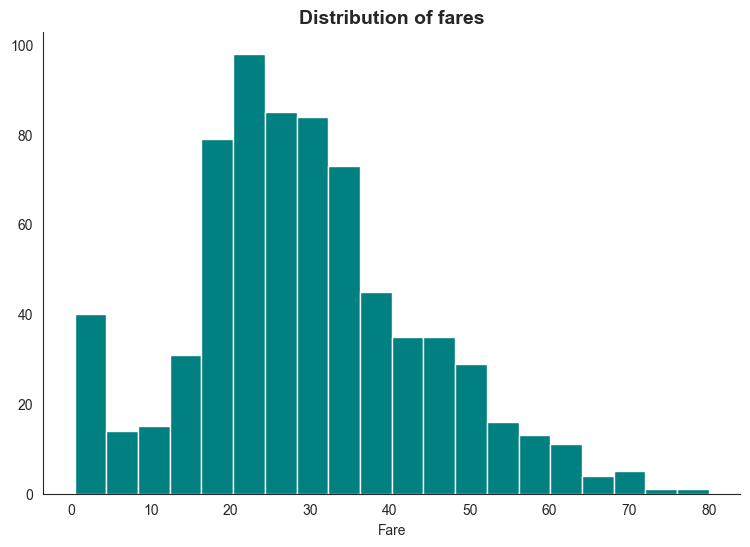

In [153]:
plt.figure(figsize=(9,6))
sns.set_style("white")
plt.hist(titanic["age"], bins=20, color="#008080")
plt.title("Distribution of fares", fontsize=14, weight="bold")
plt.xlabel("Fare")
sns.despine()
plt.show()

# SCATTER PLOT
Para ver relacion entre variables


In [165]:
movies = pd.read_csv('../data_extra/movies.csv',encoding='latin1', on_bad_lines='skip', delimiter=';')
movies.set_index('ID',inplace=True)

In [166]:
movies

,title,Production company,Distributed by,Country,Running time (int),Budget (float),Box office (float),Release date (datetime),Rated,Oscar Awards,...,Genre,imdb,Directed by,Written by,Based on,Produced by,Starring,Music by,Narrated by,Edited by
ID,,,,,,,,,,,,,,,,,,,,,
0,Academy Award Review of Walt Disney Cartoons,Walt Disney Productions,United Artists,United States,410,NaN,4.547200e+05,19/5/1937,G,0,...,"Animation, Short, Comedy",7.1,Burt Gillett,Burt Gillet,NaN,Walt Disney,"['Dorothy Compton', 'Eddie Holden', 'Mary Mode...",Frank Churchill,Billy Bletcher,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,RKO Radio Pictures,United States,830,1.490000e+07,4.180000e+09,21/12/1937,G,1,...,"Animation, Adventure, Family",7.6,David Hand,Ted Sears,Snow White by The Brothers Grimm,Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har...",Frank Churchill,NaN,NaN
2,Pinocchio,Walt Disney Productions,RKO Radio Pictures,United States,880,2.600000e+07,1.640000e+09,7/12/1940,G,2,...,"Animation, Adventure, Comedy",7.5,Ben Sharpsteen,Ted Sears,The Adventures of Pinocchio by Carlo Collodi,Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R...",Leigh Harline,NaN,NaN
3,Fantasia,Walt Disney Productions,RKO Radio Pictures,United States,1260,2.280000e+07,8.330000e+08,13/11/1940,G,0,...,"Animation, Family, Fantasy",7.7,Samuel Armstrong,Joe Grant,NaN,Walt Disney,"['Leopold Stokowski', 'Deems Taylor']",Leopold Stokowski,Deems Taylor,NaN
4,The Reluctant Dragon,Walt Disney Productions,RKO Radio Pictures,United States,740,6.000000e+06,9.600000e+06,27/6/1941,G,0,...,"Animation, Comedy, Family",6.8,Alfred Werker,Ted Sears,NaN,Walt Disney,"['Robert Benchley', 'Frances Gifford', 'Buddy ...",Frank Churchill,NaN,Paul Weatherwax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Polar Bear,Disneynature,Disney+,United States,840,NaN,NaN,22/4/2022,PG,0,...,Documentary,6.9,Alastair Fothergill,David Fowler,NaN,Alastair Fothergill,NaN,Harry Gregson-Williams,Catherine Keener,NaN
488,Chip 'n Dale: Rescue Rangers,Walt Disney Pictures,Disney+,United States,960,7.000000e+08,6.755000e+06,20/5/2022,PG,0,...,"Animation, Adventure, Comedy",7.0,Akiva Schaffer,Dan Gregor,Rescue Rangers properties and characters by Di...,David Hoberman,"['John Mulaney', 'Andy Samberg', 'KiKi Layne',...",Brian Tyler,NaN,Brian Olds
489,Hollywood Stargirl,Walt Disney Pictures,Disney+,United States,1050,NaN,NaN,3/6/2022,PG,0,...,"Comedy, Drama, Family",5.6,Julia Hart,Jordan Horowitz,Characters by Jerry Spinelli,Ellen Goldsmith-Vein,"['Grace VanderWaal', 'Elijah Richardson', 'Tyr...",Michael Penn,NaN,Shayar Bhansali


In [168]:
movies.Genre.unique()

array(['Animation, Short, Comedy', 'Animation, Adventure, Family',
       'Animation, Adventure, Comedy', 'Animation, Family, Fantasy',
       'Animation, Comedy, Family', 'Animation, Adventure, Drama',
       'Animation, Short, Adventure', 'Documentary, Animation, History',
       'Animation, Drama, Family', 'Adventure, Drama, Family',
       'Adventure, Family', 'Adventure, Family, Fantasy',
       'Action, Adventure, Family', 'Family, Documentary',
       'Adventure, Biography, Drama', 'Documentary, Family',
       'Drama, Family', 'Adventure, Comedy, Drama', 'Family, Western',
       'Adventure, Family, History', 'Comedy, Family, Fantasy', 'Drama',
       'Horror, Thriller', 'Comedy, Drama, Family',
       'Adventure, Family, Western', 'Short, Comedy',
       'Comedy, Family, Sci-Fi', 'Comedy, Family, Music',
       'Comedy, Sci-Fi, Family', 'Comedy, Family, Musical',
       'Adventure, Family, Mystery', 'Comedy, Crime, Drama',
       'Comedy, Crime, Family', 'Comedy, Family',
    

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
C:\Users\alejo\poo_teorica\lib\site-packages\matplotlib\colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
C:\Users\alejo\poo_teorica\lib\site-packages\matplotlib\ticker.py:548: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


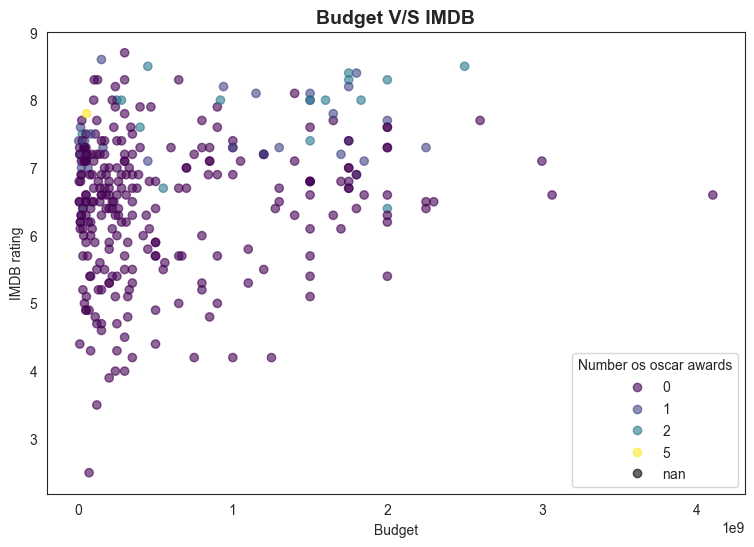

In [171]:
plt.figure(figsize=(9,6))
scatter=plt.scatter(movies['Budget (float)'],
            movies['imdb'],
           alpha=0.6,
           c=movies['Oscar Awards'],
           cmap='viridis')
plt.title("Budget V/S IMDB", fontsize=14, weight="bold")
plt.xlabel("Budget")
plt.ylabel("IMDB rating")
plt.legend(*scatter.legend_elements(), loc="lower right", title="Number os oscar awards")
plt.show()

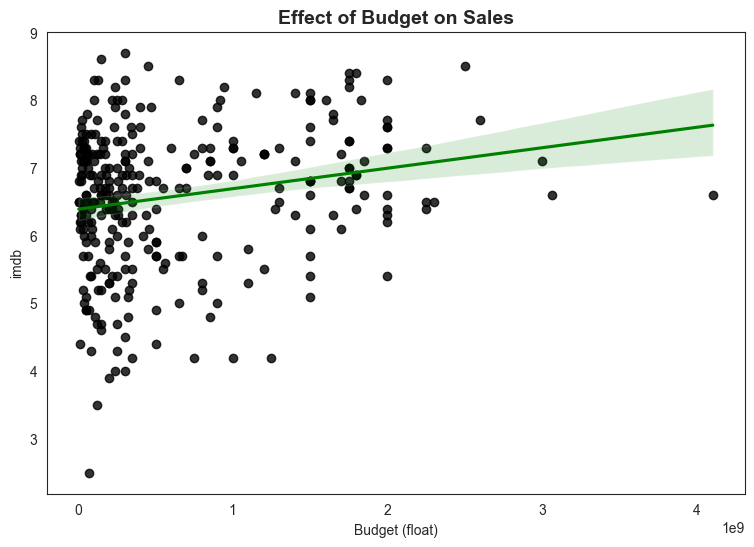

In [172]:
plt.figure(figsize=(9,6))
sns.regplot(x="Budget (float)",
            y="imdb",
            data= movies,
            scatter_kws={'color':'k'},
            line_kws={'color':'green'})
plt.title("Effect of Budget on Sales", fontsize=14, weight="bold")
plt.show()